In [3]:
!pip install scikit-dsp-comm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 2.5 MB/s eta 0:00:00


In [4]:
# Mengimpor library yang diperlukan
%pylab inline
#%pylab notebook # untuk plot yang dapat diedit di notebook
#%matplotlib qt # untuk plot popout
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [5]:
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

In [9]:
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d

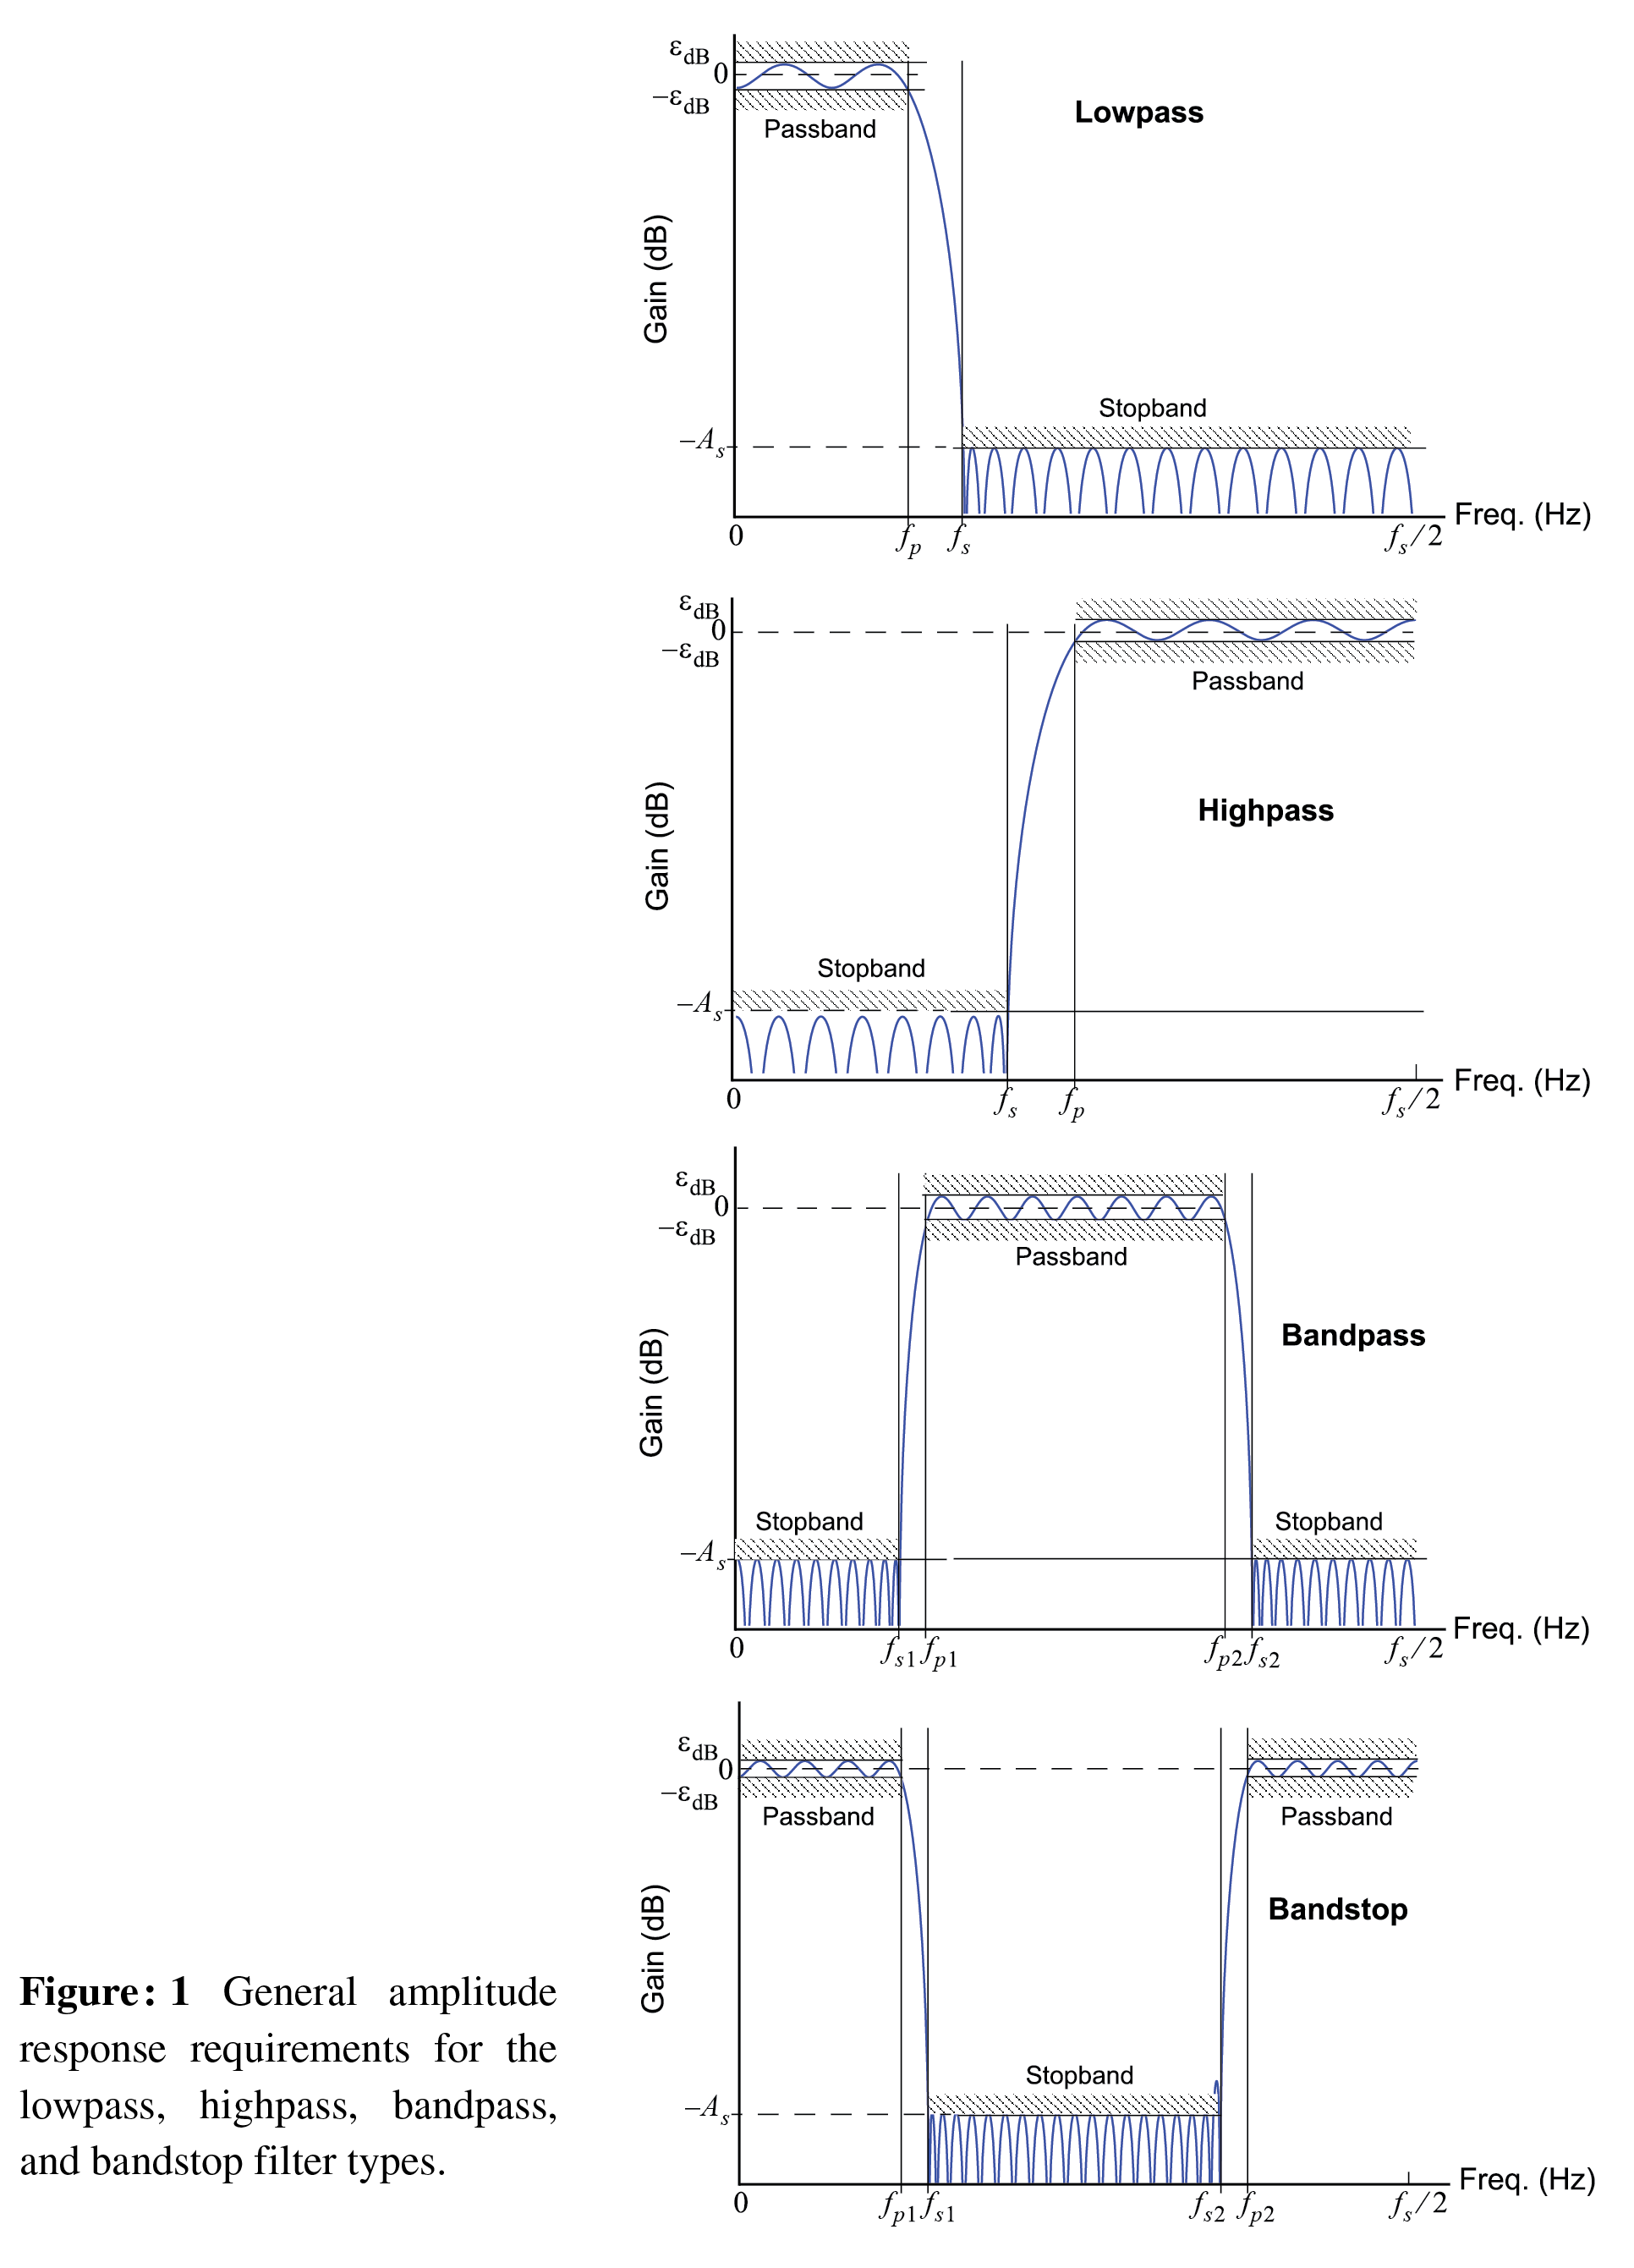

Gambar diatas menunjukkan grafik karakteristik frekuensi dari berbagai jenis filter elektronik, yang diplot dengan gain (dalam dB) terhadap frekuensi (dalam Hz). Berikut ini penjelasan dari masing-masing jenis filter yang ditampilkan dalam gambar:

1. **Lowpass Filter (Penyaring Lolos Bawah):**
   - **Karakteristik:**
     - Memiliki pita lolos (passband) yang memungkinkan frekuensi rendah melewatinya hingga batas frekuensi tertentu yang disebut frekuensi potong (`f_c1`).
     - Pada frekuensi lebih tinggi dari `f_c1`, filter ini menolak frekuensi tersebut yang disebut sebagai pita tolak (stopband).
   - **Grafik:**
     - Gain tinggi di pita lolos dan turun drastis pada dan di luar frekuensi potong ke nilai minimum pada pita tolak.

2. **Highpass Filter (Penyaring Lolos Atas):**
   - **Karakteristik:**
     - Memungkinkan frekuensi tinggi lewat melebihi frekuensi potong (`f_c1`), sementara frekuensi di bawah ini ditolak.
   - **Grafik:**
     - Gain rendah pada frekuensi rendah (pita tolak) dan meningkat di atas frekuensi potong, mempertahankan level tinggi di pita lolos.

3. **Bandpass Filter (Penyaring Pita Lolos):**
   - **Karakteristik:**
     - Memungkinkan rentang frekuensi tertentu melewati filter antara dua titik potong (`f_c1` dan `f_c2`), sementara frekuensi di luar range ini ditolak.
   - **Grafik:**
     - Gain tinggi di antara dua frekuensi potong (pita lolos) dan rendah di luar frekuensi tersebut (pita tolak).

4. **Bandstop Filter (Penyaring Pita Tolak atau Notch Filter):**
   - **Karakteristik:**
     - Memblokir atau menolak rentang frekuensi tertentu antara `f_c1` dan `f_c2`, sementara membiarkan frekuensi lainnya lewat.
   - **Grafik:**
     - Gain rendah pada pita tolak dan tinggi di luar band tersebut (pita lolos).

Dari grafik tersebut, Anda dapat melihat karakteristik operasional setiap filter dalam aplikasi elektronik, tergantung pada kebutuhan spesifik untuk membiarkan atau menolak rentang frekuensi tertentu.

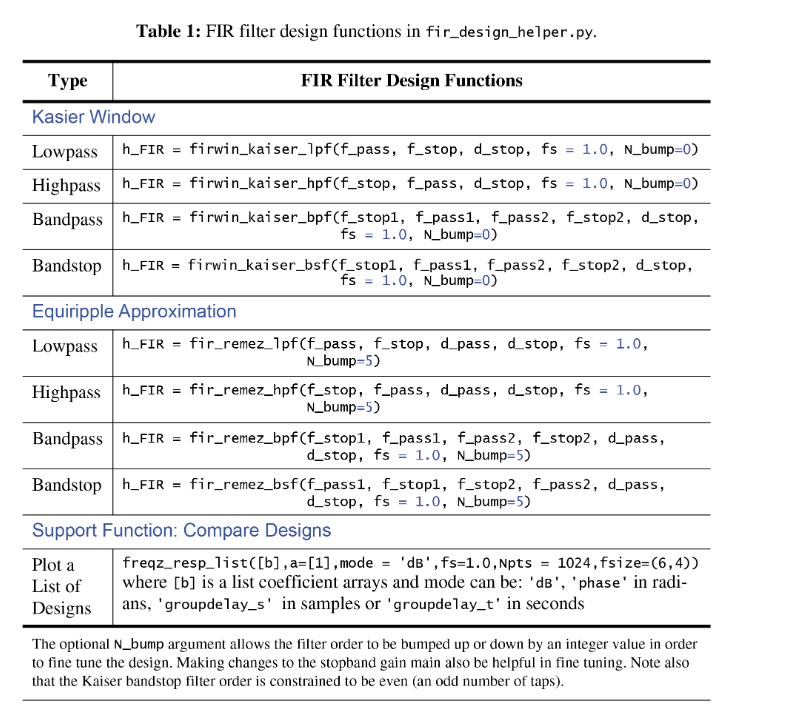

Gambar ini menunjukkan sebuah diagram atau grafik yang terdiri dari empat kategori yang tampaknya dinilai dengan skala numerik bervariasi. Keempat kategori tersebut terlabel sebagai:

1. Kasier Window
2. Equiripple Approximation
3. Support Function: Compare Designs

Setiap kategori memiliki nilai yang berbeda yang dituliskan di sebelah kanan, seperti "-5", "1.0" dan "0". Namun, tidak ada skala pasti atau penjelasan tambahan mengenai maksud dari nilai-nilai ini.

Format penggambaran tidak menunjukkan hubungan atau trend yang jelas antar kategori, dan tampaknya seperti penilaian kualitatif atau kuantitatif yang sederhana tanpa konteks tambahan. Diagram ini memerlukan informasi lebih lanjut untuk dapat dipahami secara lebih mendalam.

In [10]:
b_k = fir_d.firwin_kaiser_lpf(1/8,1/6,50,1.0)
b_r = fir_d.fir_remez_lpf(1/8,1/6,0.2,50,1.0)

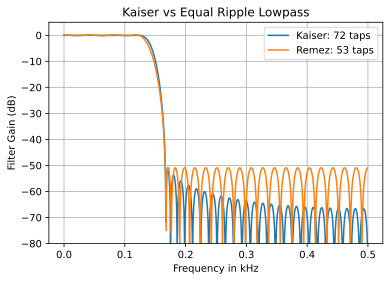

In [11]:
fir_d.freqz_resp_list([b_k,b_r],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

Gambar diatas membandingkan performa dari dua jenis filter lowpass: filter Kaiser dan Equal Ripple, berdasarkan respons frekuensinya yang diukur dalam dB (decibel) terhadap frekuensi dalam satuan kHz (kilohertz).

1. **Sumbu x grafik** menunjukkan frekuensi dari 0 hingga 0.5 kHz. Ini adalah rentang frekuensi di mana respons filter dianalisis.
   
2. **Sumbu y grafik** menunjukkan gain filter dalam dB. Gain ini menunjukkan seberapa banyak sinyal pada frekuensi tertentu diizinkan melalui filter (dengan gain positif) atau seberapa banyak sinyal tersebut diredam (dengan gain negatif).

3. **Line biru (Kaiser 72 taps)**: Filter ini memiliki respons yang cukup mulus, menunjukkan penurunan gain yang tajam sekitar pada frekuensi 0.1 kHz dan kemudian stabil di bawah -60 dB. Ini mengindikasikan bahwa filter Kaiser sangat efektif dalam menekan sinyal yang melebihi frekuensi cutoff (sekitar 0.1 kHz dalam kasus ini).

4. **Line oranye (Remez 73 taps)**: Filter ini memiliki respons 'ripple' (keragaman dalam respons gain) sebelum mancapai frekuensi cutoff dan memiliki sharp cutoff seperti filter Kaiser. Setelah cutoff, filter ini menunjukkan lebih banyak variasi (ripple) pada gain, yang sering terjadi pada filter Equal Ripple, menunjukkan varian penyerapan yang sedikit kurang seragam dibandingkan dengan Kaiser.

Dari grafik ini, dapat disimpulkan bahwa kedua filter memiliki keefektifan tinggi dalam menangani frekuensi yang lebih rendah, namun terdapat perbedaan dalam hal smoothness dari respons mereka dan bagaimana mereka mengelola frekuensi di atas titik cutoff. Kaiser umumnya memiliki penyerapan yang lebih seragam, sementara Equal Ripple menawarkan variasi penyerapan namun dengan sedikit lebih banyak fluktuasi setelah titik cutoff.

In [12]:
b_k_hp = fir_d.firwin_kaiser_hpf(1/8,1/6,50,1.0)
b_r_hp = fir_d.fir_remez_hpf(1/8,1/6,0.2,50,1.0)

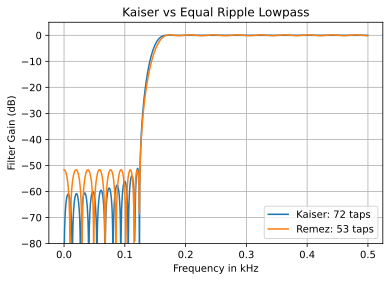

In [13]:
fir_d.freqz_resp_list([b_k_hp,b_r_hp],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

Gambar diatas menunjukkan grafik respon frekuensi untuk dua jenis filter lowpass (penyaring rendah) yang berbeda: Kaiser dan Equal Ripple. Grafik ini menampilkan gain filter (dalam dB) terhadap frekuensi (dalam kHz).

1. **Garis Biru** (dengan keterangan "Kaiser: 72 taps"):
   - Filter ini menggunakan metode Kaiser. Garis ini menunjukkan bahwa filter memiliki sifat memotong frekuensi dengan cukup tajam di sekitar frekuensi cut-off, yang tampaknya sekitar 0.2 kHz. Di atas itu, gain berkurang drastis menunjukkan penurunan yang kuat dalam respon filter terhadap frekuensi yang lebih tinggi.
   - "72 taps" menunjukkan bahwa filter ini menggunakan 72 koefisien dalam perhitungannya.

2. **Garis Oranye** (dengan keterangan "Remez: 53 taps"):
   - Filter ini menggunakan metode Remez (kadang-kadang disebut sebagai equal ripple atau minimax), yang ciri khasnya adalah memiliki variasi ripple yang seragam dalam spektrum gainnya. Garis ini menunjukkan bahwa filter memiliki ripples (fluktuasi) yang relatif seragam di bagian passband (bereaksi hampir konstan sampai 0.2 kHz) dan stopband.
   - "53 taps" menunjukkan bahwa filter ini menggunakan 53 koefisien.

Grafik ini umumnya digunakan dalam analisis sistem filter digital untuk melihat bagaimana masing-masing filter bertindak atas sinyal input dalam domain frekuensi dan untuk membandingkan efisyensi dan efektivitas antara dua metode filter berbeda terhadap spesifikasi yang diberikan. Filter seperti ini banyak digunakan dalam aplikasi pemrosesan sinyal seperti audio, komunikasi nirkabel, dan lain-lain.

In [14]:
b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000)
b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000)

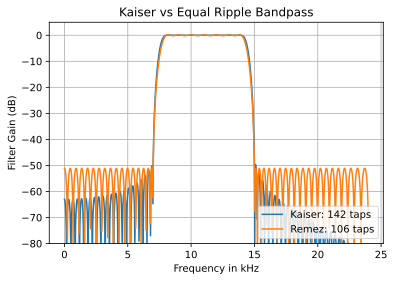

In [15]:
fir_d.freqz_resp_list([b_k_bp,b_r_bp],[[1],[1]],'dB',fs=48)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Bandpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k_bp),
        r'Remez: %d taps' % len(b_r_bp)),
       loc='lower right')
grid();

Gambar ini menampilkan grafik yang membandingkan respons gain filter dari dua jenis filter digital: Filter Kaiser dan Filter Equal Ripple (sering dikenal sebagai Chebyshev Type II) diukur dalam desibel (dB) terhadap frekuensi dalam kiloHertz (kHz).

1. **Sumbu-Y (Vertikal):** Menunjukkan besar gain filter dalam desibel (dB). Pengukuran ini menunjukkan seberapa kuat sinyal tertentu diperkuat atau diredam oleh filter. Nilai negatif menunjukkan penurunan kekuatan sinyal.

2. **Sumbu-X (Horizontal):** Menunjukkan frekuensi sinyal dalam kiloHertz (kHz). Ini adalah ukuran seberapa cepat sinyal berubah atau bergetar setiap detik.

3. **Kurva Biru (Kaiser):** Menunjukkan responsi frekuensi dari filter Kaiser. Grafik ini menunjukkan bahwa filter memiliki 'tap' sebanyak 142, yang merupakan indikator dari kompleksitas dan panjang filter. Kaiser filter bisa sangat efektif dalam mengontrol lebar pita transisi antara passband (daerah yang gainnya tinggi, dekat dengan 0 dB) dan stopband (daerah dengan gain sangat rendah, mendekati atau di bawah -70 dB).

4. **Kurva Oranye (Equal Ripple/Remez):** Menunjukkan responsi frekuensi dari filter Equal Ripple. Filter ini memiliki 106 taps, dan terlihat dari grafik memiliki ripple (fluktuasi dalam respons frekuensi) yang cukup seragam di stopband, tetapi secara umum menunjukkan gain yang konsisten di passband.

**Ringkasan:**
- **Passband:** Area di mana filter bertujuan untuk melewatkan frekuensi dengan sedikit atau tanpa perubahan (gain mendekati 0 dB), biasanya untuk mempertahankan sinyal yang diinginkan.
- **Stopband:** Area di mana filter bertujuan untuk menghilangkan atau meredam frekuensi (gain sangat rendah, misalnya di bawah -60 dB), biasanya untuk menghilangkan noise atau sinyal yang tidak diinginkan.
- **Bandwidth Transisi:** Transisi antara passband dan stopband menunjukkan seberapa cepat filter bisa berpindah dari membiarkan frekuensi lewat ke meredamnya dengan kuat.

Filter seperti ini sering digunakan dalam pemrosesan sinyal digital, terutama dalam aplikasi audio, telekomunikasi, dan pengolahan sinyal lainnya untuk mengontrol isi frekuensi dari signal yang masuk atau keluar dari sistem.

In [16]:
b_up = fir_d.fir_remez_lpf(3300,4300,0.5,60,96000)

In [17]:
mr_up = mrh.multirate_FIR(b_up)

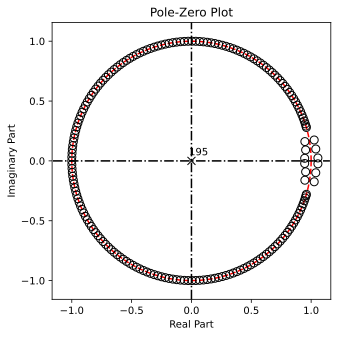

In [18]:
# Take a look at the pole-zero configuration of this very
# high-order (many taps) linear phase FIR
mr_up.zplane()

Gambar ini merupakan sebuah diagram "Pole-Zero Plot" yang biasa digunakan dalam analisis sistem kontrol atau sistem pemrosesan sinyal. Plot ini menampilkan lokasi kutub (poles) dan nol (zeros) dari suatu fungsi transfer pada bidang kompleks. Mari kita analisis lebih detail:

1. **Sumbu Horizontal (Real Part):** Sumbu ini mewakili bagian real dari bilangan kompleks.

2. **Sumbu Vertikal (Imaginary Part):** Sumbu ini mewakili bagian imajiner dari bilangan kompleks.

3. **Lingkaran:** Terdapat sebuah lingkaran besar yang berpusat di origin (titik (0,0)) dengan radius satu. Lingkaran ini biasanya mewakili batas stabilitas sistem dalam beberapa konteks, seperti sistem filter digital.

4. **Titik-titik Merah (X):** Titik-titik ini merepresentasikan posisi "poles" atau kutub. Pada gambar ini, banyak kutub terletak pada atau dekat dengan lingkaran unit, kecuali dua kutub cenderung lebih dekat ke sumbu real.

5. **Lingkaran Kecil Putih (O):** Lingkaran-lingkaran kecil ini merepresentasikan posisi "zeros" atau nol. Dalam gambar ini, semua zeros terletak pada satu titik di sumbu real, tepatnya di angka kira-kira 0.95 pada sumbu real.

Plot seperti ini sangat penting saat menganalisis sifat stabilitas dan respons frekuensi dari sistem. Lokasi kutub dapat menentukan stabilitas sistem; sistem dianggap stabil jika semua kutub berada dalam lingkaran unit pada bidang s kompleks (untuk sistem waktu kontinu) atau di dalam lingkaran tersebut (untuk sistem waktu diskrit). Lokasi dari zeros tidak mempengaruhi stabilitas, tetapi mempengaruhi bentuk respons frekuensi sistem.

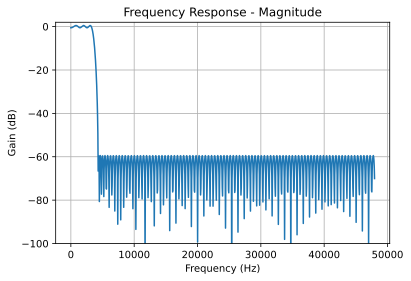

In [19]:
# Verify the passband and stopband gains are as expected
mr_up.freq_resp('db',96000)

Gambar ini menampilkan grafik respons frekuensi dalam bentuk magnitudo. Grafik ini digunakan untuk menunjukkan bagaimana sebuah sistem, seperti speaker atau sistem elektronik, merespons terhadap berbagai frekuensi suara atau sinyal.

- **Sumbu Y**: Menunjukkan gain dalam desibel (dB). Gain menggambarkan perubahan amplitudo output sistem relatif terhadap inputnya. Gain negatif menunjukkan bahwa output lebih kecil dari input.
- **Sumbu X**: Menunjukkan frekuensi dalam Hertz (Hz). Ini menggambarkan seberapa cepat getaran gelombang suara atau sinyal elektronik terjadi per detik.

Pada grafik ini, ada beberapa karakteristik yang menonjol:
1. **Penurunan Tajam di Awal**: Di bagian awal skala frekuensi, terlihat penurunan tajam pada gain. Ini bisa mengindikasikan filter frekuensi rendah (low-pass filter) yang menyaring frekuensi tinggi dan hanya membiarkan frekuensi rendah melewatinya.
2. **Oscilasi**: Setelah penurunan awal, grafik menunjukkan osilasi yang stabil dengan amplitude yang lebih kecil pada level gain sekitar -80 dB, yang mungkin mengindikasikan karakteristik respons dari sistem terhadap frekuensi yang lebih tinggi.

Grafik ini sangat berguna dalam teknik elektro dan akustik untuk mengidentifikasi bagaimana sebuah sistem akan bereaksi terhadap berbagai frekuensi, yang penting dalam mendesain sistem audio, pengolahan sinyal, dan aplikasi terkait.

In [20]:
(len(b_up-1))/2

98.0

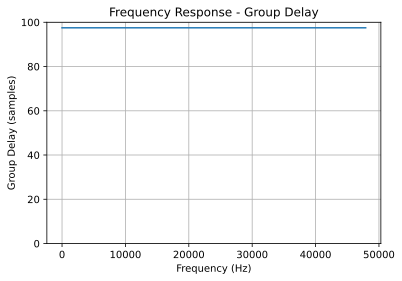

In [21]:
# Verify that the FIR design has constant group delay (N_taps - 1)/2 samples
mr_up.freq_resp('groupdelay_s',96000,[0,100])

Gambar diatas menunjukkan sebuah grafik "Frequency Response - Group Delay". Grafik ini digunakan untuk menggambarkan hubungan antara delay kelompok (Group Delay), yang diukur dalam satuan sampel, dengan frekuensi sinyal, yang diukur dalam Hertz (Hz).

Pada sumbu horizontal (x-axis) dari grafik, frekuensi ditampilkan mulai dari 0 Hz hingga 50.000 Hz. Sumbu vertikal (y-axis) menunjukkan group delay dalam satuan sampel mulai dari 0 hingga 100 sampel.

Grafik ini biasanya digunakan dalam bidang pengolahan sinyal dan rekayasa audio untuk menganalisis seberapa besar waktu tunda yang berbeda pada frekuensi yang berbeda dalam sistem atau komponen audio, yang sangat penting untuk desain sistem audio dan pemahaman karakteristik waktu-responsnya. Namun, pada grafik ini tidak ada data yang ditampilkan; hanya kerangka grafik yang terlihat tanpa garis plot, yang berarti grafik ini belum diisi dengan data pengukuran atau hasil analisis.

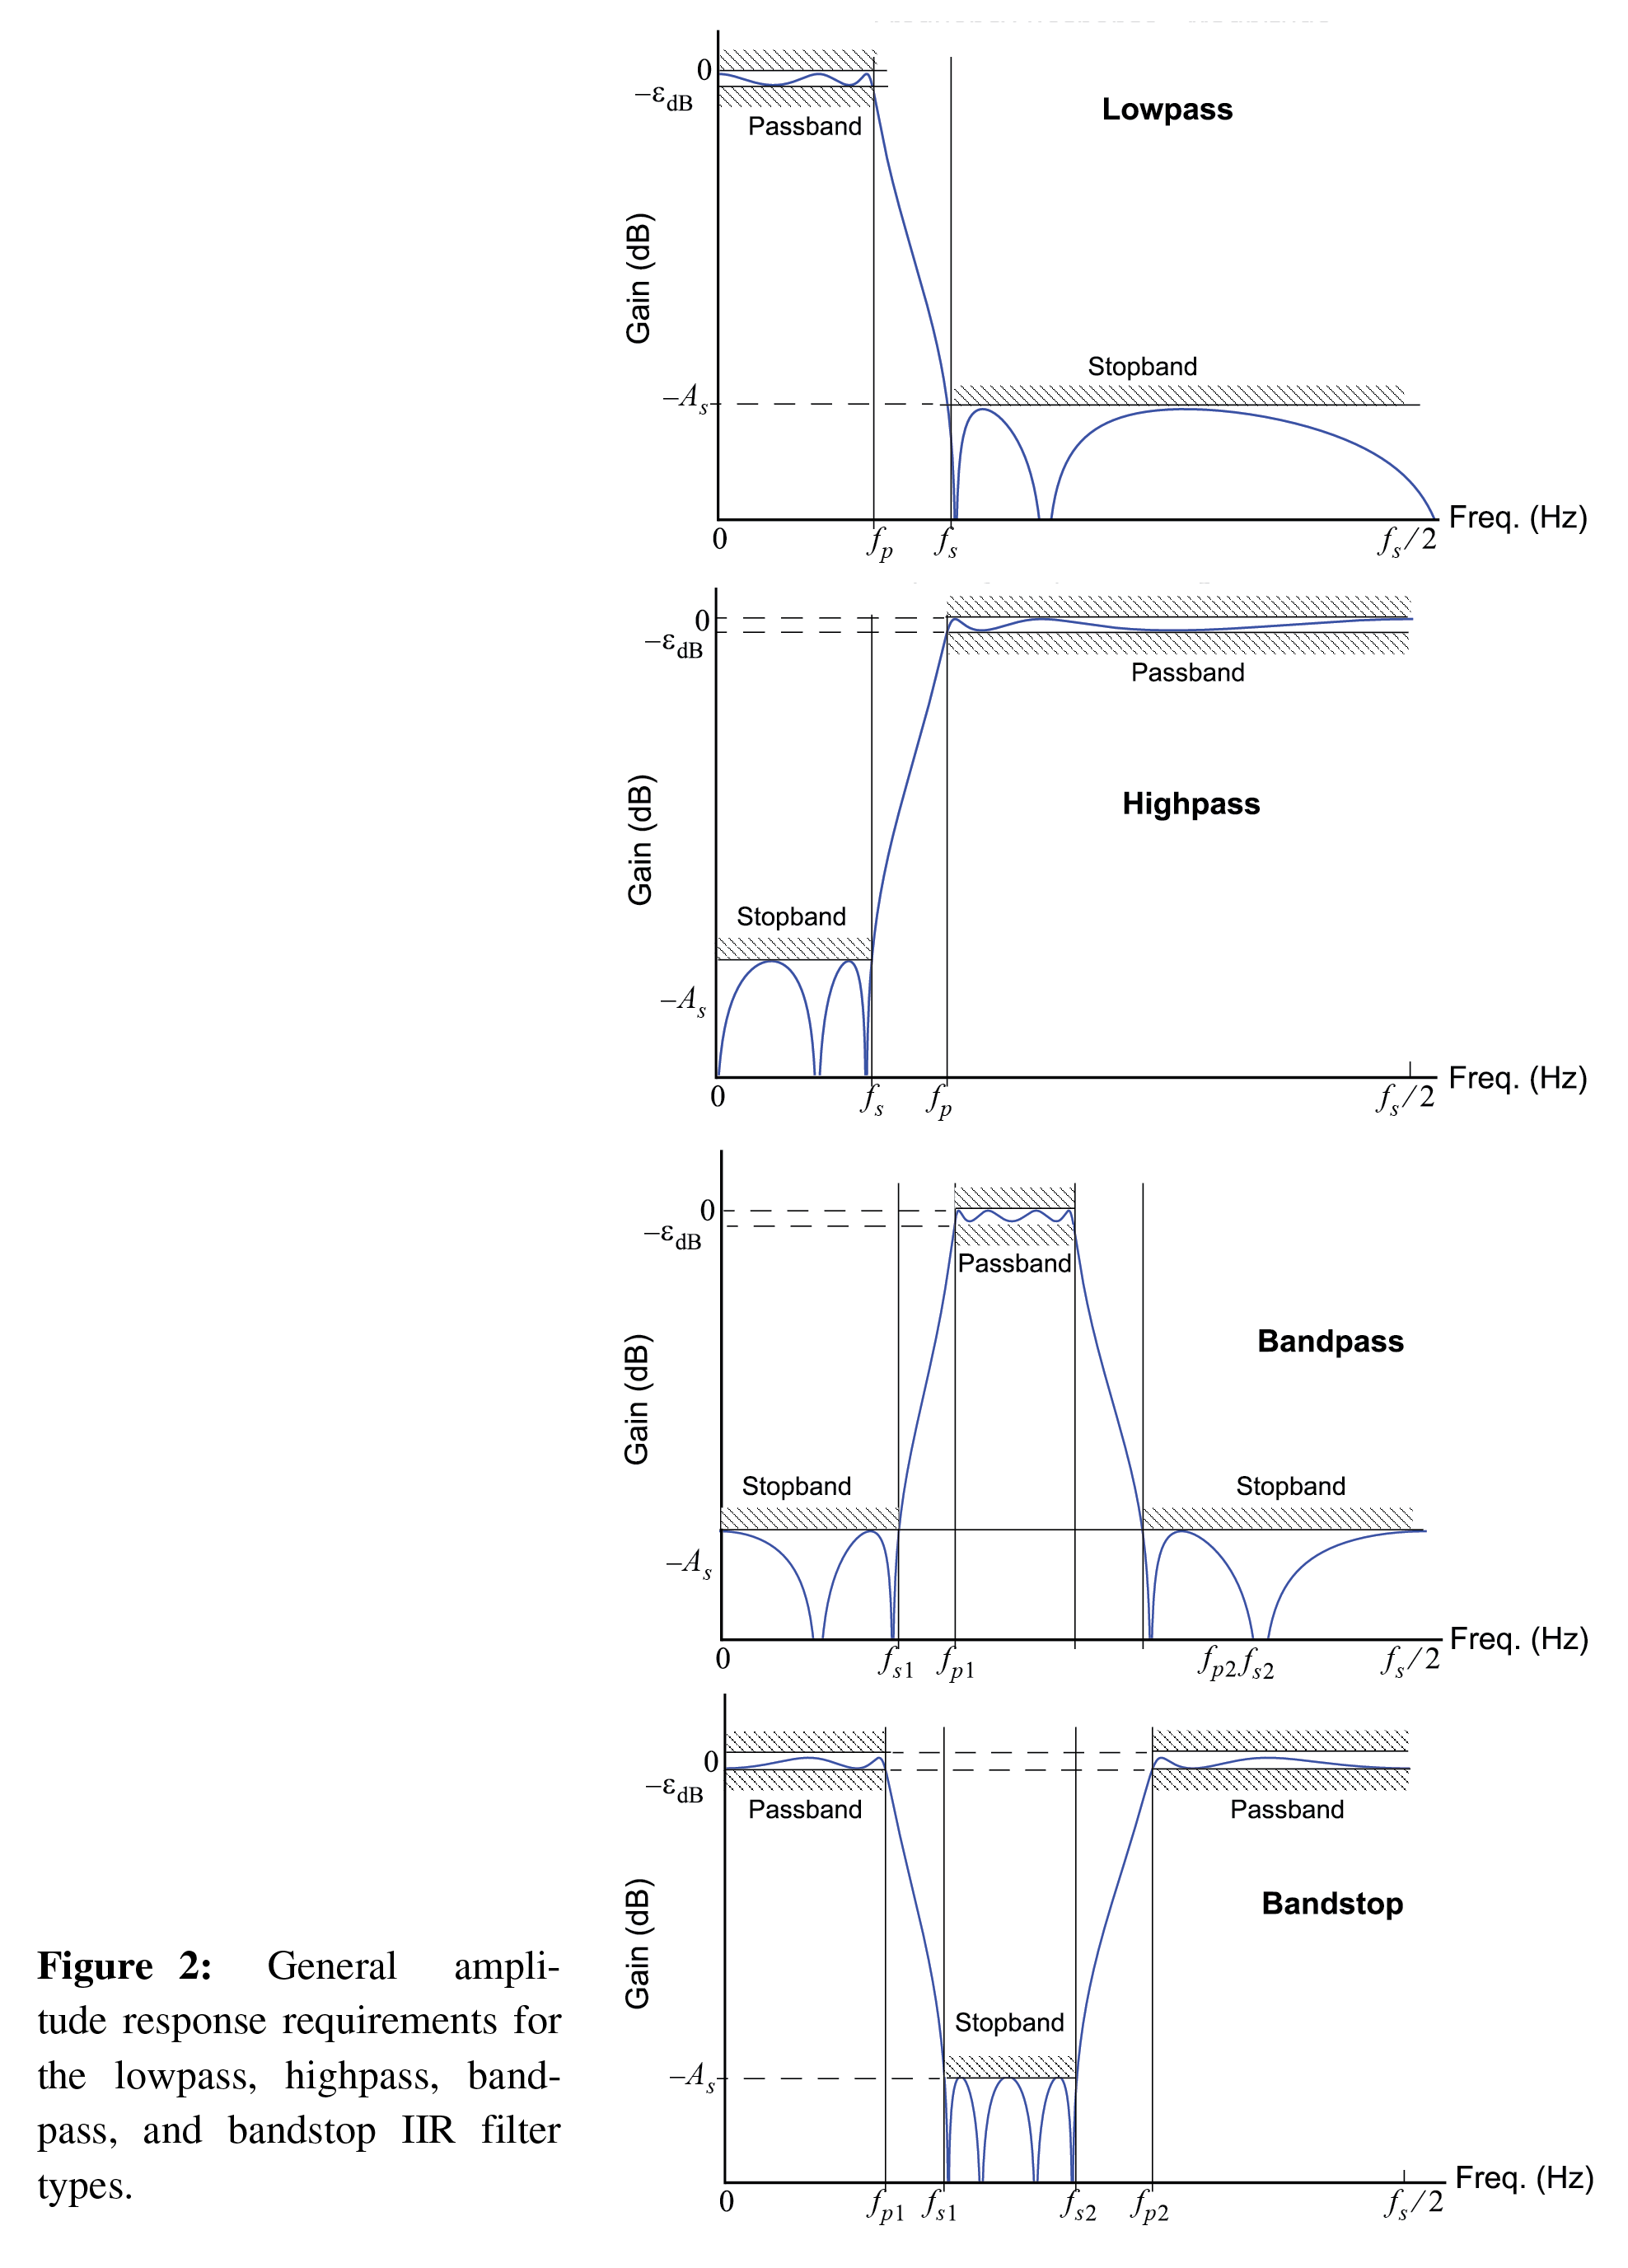

Gambar diatas menunjukkan diagram frekuensi yang menggambarkan karakteristik dari berbagai jenis filter dalam pemrosesan sinyal. Berikut adalah penjelasan untuk masing-masing filter yang ditampilkan pada gambar:

1. **Lowpass Filter (Filter Lolos-Rendah)**
   - Gambar pertama menunjukkan filter lolos-rendah. Filter ini memungkinkan frekuensi di bawah frekuensi cutoff (ditandai sebagai $f_c$) untuk lolos dengan sedikit atau tanpa redaman, sedangkan frekuensi di atas $f_c$ sangat direduksi atau "dihambat". Ini terutama digunakan untuk menghilangkan kebisingan frekuensi tinggi.

2. **Highpass Filter (Filter Lolos-Tinggi)**
   - Gambar kedua adalah filter lolos-tinggi. Ini adalah kebalikan dari filter lolos-rendah: frekuensi di bawah cutoff ($f_c$) direduksi, dan frekuensi di atas $f_c$ lolos dengan sedikit atau tanpa redaman. Filter ini berguna untuk menghilangkan komponen frekuensi rendah seperti drift DC dari sinyal.

3. **Bandpass Filter (Filter Lolos-Pita)**
   - Gambar ketiga menunjukkan filter lolos-pita. Filter ini direka untuk meloloskan frekuensi dalam rentang tertentu (antara $f_{c1}$ dan $f_{c2}$) dengan sedikit atau tanpa redaman, sedangkan frekuensi di luar rentang ini direduksi. Filter ini digunakan ketika hanya frekuensi dalam rentang tertentu yang diinginkan.

4. **Bandstop Filter (Filter Hambat-Pita)**
   - Gambar keempat adalah filter hambat-pita. Filter ini bekerja secara terbalik dengan filter lolos-pita, di mana ia memblokir atau meredam frekuensi dalam rentang tertentu (antara $f_{c1}$ dan $f_{c2}$) dan meloloskan frekuensi di luar rentang tersebut. Filter ini sering digunakan untuk menghilangkan gangguan atau kebisingan pada frekuensi spesifik.
   
Setiap filter ini memiliki kegunaannya masing-masing dalam berbagai aplikasi teknik elektro dan telekomunikasi, seperti pemrosesan audio, radio, dan sistem komunikasi lainnya. Diagram ini bermanfaat dalam memvisualisasikan bagaimana masing-masing filter ini bertindak terhadap spektrum frekuensi sinyal.

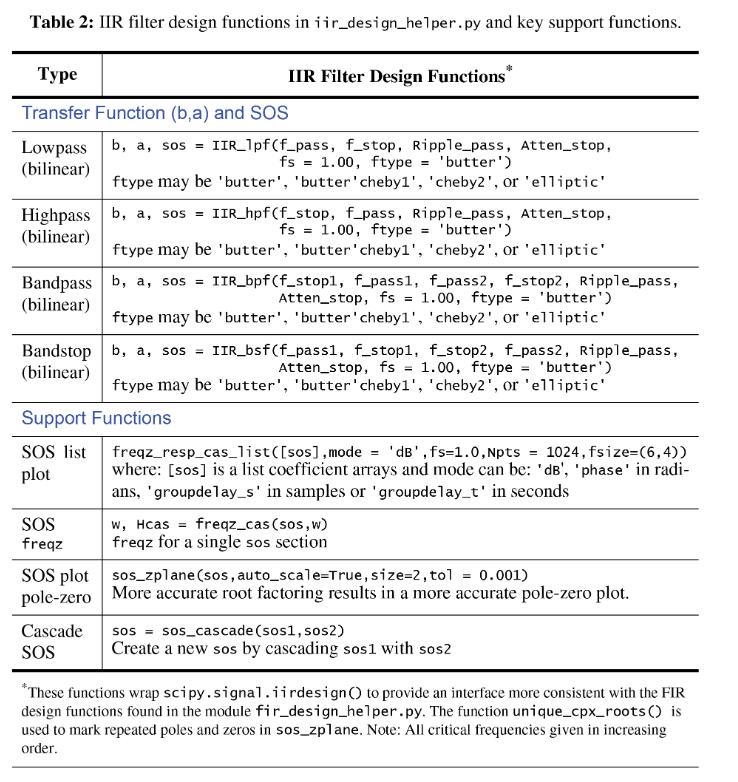

Gambar tersebut menunjukkan sebuah tabel yang menguraikan berbagai jenis "Transfer Function Filter Specifications" untuk filter IIR (Infinite Impulse Response). Tabel ini secara spesifik merinci jenis-jenis filter digital beserta parameter-parameter untuk mengimplementasikannya. Tabel ini dibagi menjadi beberapa kolom yang masing-masing memiliki tujuan berikut:

1. **Type**: Menunjukkan jenis filter yang digunakan. Tipe-tipe yang tercantum di sini termasuk:
   - Lowpass (membiarkan frekuensi rendah untuk lulus dan memblokir frekuensi tinggi).
   - Highpass (membiarkan frekuensi tinggi untuk lulus dan memblokir frekuensi rendah).
   - Bandpass (membiarkan sebuah pita frekuensi tertentu untuk lulus dan memblokir frekuensi di luar pita tersebut).
   - Bandstop (sebaliknya dari bandpass, memblokir pita frekuensi tertentu dan membiarkan yang lain lulus).

2. **Functions**: Kode atau fungsi yang diperlukan untuk mengimplementasikan setiap jenis filter ini. Fungsi-fungsi tersebut merupakan bagian dari pustaka pemrosesan sinyal digital, yang mungkin disediakan dalam berbagai paket perangkat lunak pengolahan sinyal atau bahasa pemrograman seperti MATLAB.

3. **Description**: Deskripsi lebih lanjut tentang karakteristik setiap filter, mencantumkan jenis-jenis 'butterworth', 'chebyshev', 'elliptic', dan lain-lain, yang masing-masing memiliki karakteristik phase dan response frekuensi yang berbeda.

Setiap baris dari tabel menyajikan konfigurasi untuk jenis filter yang berbeda, termasuk metode desain yang optimal (butterworth, chebyshev, elliptic, atau bessel), nilai-nilai default untuk parameter filt_filter seperti frekuensi cutoff (`fc`), order filter (`order`), frekuensi sampling (`fs`), dan karakteristik lainnya.

Secara keseluruhan, tabel ini berguna sebagai panduan atau referensi cepat untuk merancang berbagai jenis filter IIR dengan spesifikasi yang diinginkan dalam aplikasi pemrosesan sinyal digital.

In [24]:
fs = 48000
f_pass = 5000
f_stop = 8000
b_but,a_but,sos_but = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'butter')
b_cheb1,a_cheb1,sos_cheb1 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby1')
b_cheb2,a_cheb2,sos_cheb2 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby2')
b_elli,a_elli,sos_elli = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'ellip')

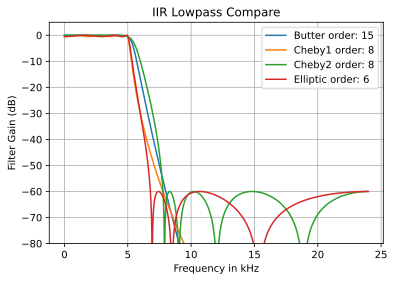

In [35]:
iir_d.freqz_resp_cas_list([sos_but,sos_cheb1,sos_cheb2,sos_elli],'dB',fs=48)
ylim([-80,5])
title(r'IIR Lowpass Compare')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Butter order: %d' % (len(a_but)-1),
        r'Cheby1 order: %d' % (len(a_cheb1)-1),
        r'Cheby2 order: %d' % (len(a_cheb2)-1),
        r'Elliptic order: %d' % (len(a_elli)-1)),loc='best')
grid();

Gambar tersebut menggambarkan respons gain filter dalam bentuk desibel (dB) terhadap frekuensi diukur dalam kilohertz (kHz) untuk empat jenis filter IIR (Infinite Impulse Response) yang berbeda. Berikut adalah detail dari masing-masing filter yang diperlihatkan dalam grafik:

1. **Butterworth Order 15 (warna biru)**: Filter Butterworth dikenal karena memiliki respons frekuensi yang sangat halus di dalam bandpass. Grafik menunjukkan bahwa filter ini mulai memotong frekuensi di sekitar 2 kHz dan memiliki kemerosotan yang relatif lambat dibandingkan filter lainnya.

2. **Chebyshev Order 8 (warna merah)**: Filter Chebyshev memiliki sedikit riak pada bandpass, tetapi memberikan kemerosotan yang lebih tajam dibandingkan dengan filter Butterworth. Dalam grafik, Terlihat mulai memotong frekuensi di sekitar 1 kHz.

3. **Elliptic Order 6 (warna hijau)**: Filter Elliptic, atau Cauer filter, menawarkan kemerosotan yang paling tajam dari semua filter yang ditampilkan, tetapi pada harga dari riak yang lebih besar di bandpass dan bandstop. Filter ini menunjukkan paling banyak variasi dalam gain dan mulai memotong dengan sangat tajam tepat di bawah 1 kHz.

Kurva ini digunakan untuk menunjukkan bagaimana masing-masing jenis filter merespons perubahan frekuensi dan bagaimana mereka mengendalikan frekuensi di luar batas yang ditentukan untuk aplikasi tertentu, seperti sistem audio, telekomunikasi, dan lain-lain, di mana kontrol yang tepat dari bandwidth dan kehilangan sinyal sangat penting.

(15, 15)

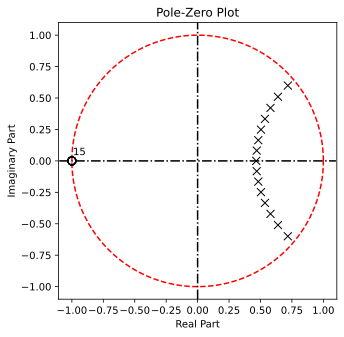

In [26]:
iir_d.sos_zplane(sos_but)

Gambar diatas menunjukkan plot kutub-nol (Pole-Zero Plot) yang digunakan dalam analisis sistem di bidang teknik dan ilmu sinyal. Plot ini menggambarkan lokasi kutub (poles) dan nol (zeros) dari sebuah fungsi transfer dalam bidang kompleks. Pada plot ini:

- Sumbu horizontal (sumbu X) melambangkan bagian real.
- Sumbu vertikal (sumbu Y) melambangkan bagian imajiner.

Titik-titik `X` menunjukkan posisi dari kutub, yang biasanya menandakan bagian dari sistem yang menghasilkan resonansi atau stabilitas tertentu. Sementara itu, titik-titik `o` (jika ada) akan menunjukkan posisi nol, yang mengindikasikan frekuensi di mana output sistem menjadi nol.

Plot ini juga menunjukkan sebuah lingkaran putus-putus (dashed circle) yang kelihatannya memiliki radius satu unit. Lingkaran ini bisa digunakan untuk mengukur atau menilai stabilitas sistem; dalam banyak kasus, sebuah sistem dianggap stabil jika semua kutubnya berada dalam lingkaran tersebut, yang berarti setiap kutub memiliki magnitude kurang dari satu.

Pada plot ini, semua kutub terletak pada atau tepat di sebatas batas lingkaran dengan nilai -0.5 pada sumbu real dan imajiner berkisar antara -0.75 hingga 0.75. Ini merupakan ciri yang khas dari beberapa jenis filter atau pemroses sinyal dalam domain frekuensi.

In [27]:
# Elliptic IIR Lowpass
b_lp,a_lp,sos_lp = iir_d.IIR_lpf(1950,2050,0.5,80,8000.,'ellip')
mr_lp = mrh.multirate_IIR(sos_lp)

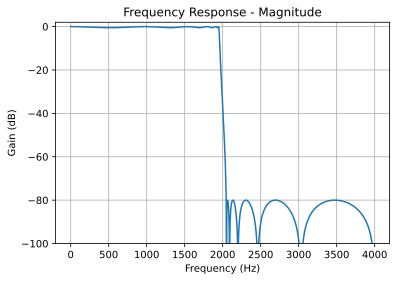

In [28]:
mr_lp.freq_resp('db',8000)

Gambar diatas menunjukkan grafik respons frekuensi yang menunjukkan besaran gain (dalam dB) terhadap frekuensi (dalam Hz). Grafik ini digunakan untuk menunjukkan bagaimana sistem atau komponen elektronik merespons berbagai frekuensi. Berikut adalah beberapa poin analisis dari grafik tersebut:

1. **Filter Notch pada Frekuensi Rendah:** Terlihat adanya penurunan tajam gain hingga hampir -100 dB pada frekuensi sekitar 200 Hz, yang menunjukkan adanya filter notch atau band-stop yang sangat menekan frekuensi tersebut.

2. **Filter Notch Lainnya:** Ada pula penurunan-penurunan tajam lain pada frekuensi sekitar 1500 Hz dan 3000 Hz, yang kembali menunjukkan keberadaan filter notch yang dirancang untuk memfilter atau menekan frekuensi-frekuensi spesifik tersebut.

3. **Datar pada Frekuensi Tinggi:** Di luar frekuensi tersebut, responsnya cukup datar pada level sekitar 0 dB hingga lebih dari 3500 Hz, menandakan sistem atau filter memiliki karakteristik yang stabil dalam merespons isyarat pada rentang frekuensi tersebut.

4. **Perilaku Out of Band:** Terlihat bahwa di luar frekuensi 3500 Hz, grafik tidak lagi memberikan informasi, yang bisa jadi menunjukkan bahwa ia tidak relevan untuk analisis lebih lanjut dalam konteks aplikasi umum sistem ini.

Grafik seperti ini sering digunakan dalam perancangan sistem audio, telekomunikasi, dan pengolahan sinyal lainnya untuk memvisualisasikan keefektifan filter atau sistem dalam merespons atau mengeliminasi frekuensi tertentu.

(-130.0, -30.0)

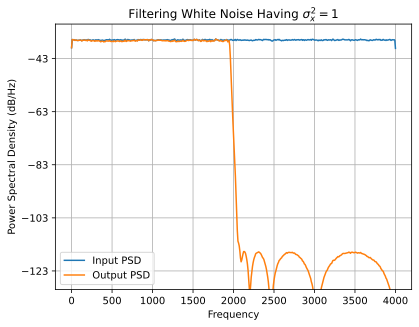

In [29]:
x = randn(1000000)
y = mr_lp.filter(x)
psd(x,2**10,8000);
psd(y,2**10,8000);
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')
legend(('Input PSD','Output PSD'),loc='best')
ylim([-130,-30])

Gambar ini adalah grafik yang menunjukkan Power Spectral Density (PSD) dalam unit desibel per Hertz (dB/Hz) terhadap frekuensi yang diukur dalam Hertz (Hz). Grafik ini digunakan untuk menggambarkan filtrasi kebisingan putih dengan menggunakan suatu metode filtering. Kebisingan putih memiliki variansi $\sigma_x^2 = 1$.

Pada grafik ini:

1. **Garis Biru** menunjukkan PSD dari `Input PSD`, yang merupakan spektral daya dari sinyal masukan sebelum proses filtrasi.
2. **Garis Oranye** mewakili PSD dari `Output PSD`, yang merupakan spektral daya dari sinyal keluaran setelah proses filtrasi.

Jika kita lihat pada grafik:
- PSD masukan terlihat konstan di semua frekuensi, sesuai dengan karakteristik kebisingan putih yang biasanya memiliki spektral daya yang sama di semua frekuensi.
- PSD keluaran memiliki puncak tajam pada beberapa titik frekuensi tertentu, yang mengindikasikan bahwa frekuensi-frekuensi tersebut tidak banyak terpengaruh oleh proses filtrasi, sedangkan di frekuensi lainnya tingkat PSD berkurang secara signifikan, menunjukkan efek dari filtrasi dalam mengurangi daya kebisingan di frekuensi tersebut.

Grafik ini bermanfaat untuk mengevaluasi kinerja filter dalam mengatur atau menghilangkan komponen kebisingan pada frekuensi tertentu dari sinyal masukan.


In [30]:
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

Expected PSD of -39.031 dB/Hz


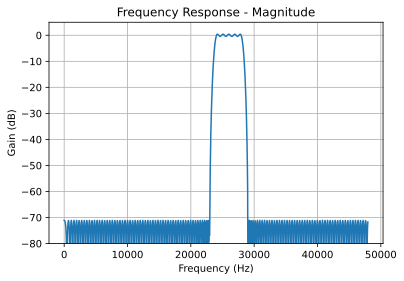

In [31]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)
ylim([-80, 5])
grid();

Gambar ini memperlihatkan grafik respons frekuensi berdasarkan magnitudo. Grafik ini biasanya digunakan untuk menggambarkan bagaimana suatu sistem elektronik atau akustik, misalnya mikrofon atau speaker, merespons berbagai frekuensi suara.

- **Sumbu X**: Menunjukkan frekuensi dalam Hertz (Hz). Mulai dari 0 Hz hingga 50.000 Hz, yang mencakup rentang frekuensi yang luas dari frekuensi rendah ke frekuensi tinggi.
- **Sumbu Y**: Menampilkan gain dalam desibel (dB), dari -80 dB sampai 0 dB.

Dari grafik, kita dapat melihat bahwa ada puncak keuntungan yang sangat spesifik antara sekitar 18.000 Hz dan 22.000 Hz, di mana gain naik mendekati 0 dB. Ini menunjukkan bahwa sistem memiliki responsivitas yang sangat tinggi atau penguatan yang meningkat pada rentang frekuensi tersebut. Di luar rentang ini, gain menunjukkan penurunan tajam, terutama di bawah -60 dB, yang mengindikasikan penurunan responsivitas sistem terhadap frekuensi di luar rentang puncak tersebut.

Grafik seperti ini sangat penting dalam menilai karakteristik perangkat audio, membantu dalam tuning dan memastikan output suara yang diinginkan sesuai dengan spesifikasi teknis suatu perangkat.

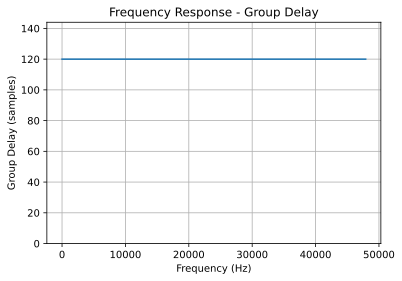

In [32]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)
grid();

Gambar tersebut adalah plot yang menunjukkan "Group Delay" terhadap "Frequency" dalam sebuah respons frekuensi. Dalam grafik ini, sumbu y (vertikal) mewakili group delay dalam satuan sampel, dan sumbu x (horizontal) mewakili frekuensi dalam satuan Hertz (Hz).

Dari grafik, kita bisa melihat bahwa group delay tetap konstan di sekitar 120 sampel untuk semua frekuensi yang diukur mulai dari 0 Hz hingga 50,000 Hz. Ini menunjukkan bahwa sistem atau komponen yang diuji memiliki group delay yang konsisten tanpa memperdulikan perubahan frekuensi, yang mungkin mengindikasikan karakteristik fase yang stabil dari sistem atau perangkat yang diukur.

Group delay adalah ukuran penundaan waktu yang dibutuhkan oleh sebuah sinyal untuk melewati sistem pada berbagai frekuensi dan sering digunakan untuk menganalisis karakteristik fase dari sistem dalam rekayasa elektronik dan audio.

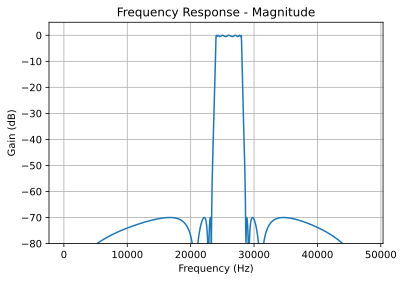

In [33]:
b_rec_bpf2,a_rec_bpf2,sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                   0.5,70,96000,'ellip')
with np.errstate(divide='ignore'):
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)
ylim([-80, 5])
grid();

Gambar diatas menunjukkan grafik yang menggambarkan respons frekuensi dalam bentuk magnitudo. Respons frekuensi adalah cara untuk menunjukkan bagaimana suatu sistem, seperti sirkuit elektronik atau filter audio, bereaksi terhadap berbagai frekuensi. Ini penting dalam banyak bidang seperti audio, elektronik, dan telekomunikasi.

Berikut beberapa poin penting dari grafik yang Anda tunjukkan:

1. **Sumbu Horizontal (Frekuensi)**: Sumbu horizontal menunjukkan frekuensi dalam satuan Hertz (Hz). Frekuensi ini berkisar dari 0 Hz hingga 50000 Hz atau 50 kHz.

2. **Sumbu Vertikal (Gain)**: Sumbu vertikal menampilkan gain dalam satuan desibel (dB), yang berkisar antara -80 dB hingga 10 dB. "Gain" menggambarkan penguatan atau peredaman yang diberikan sistem pada setiap frekuensi.

3. **Puncak pada Grafik**: Ada puncak yang sangat tajam di sekitar 20000 Hz (20 kHz), yang mencerminkan bahwa pada frekuensi tersebut, sistem memberikan gain yang sangat tinggi dengan cepat, kemudian kembali menurun. Puncak tersebut menunjukkan bahwa sistem memiliki resonansi atau penekanan khusus pada frekuensi tersebut. Ini dapat menjadi karakteristik dari filter bandpass yang dirancang untuk meningkatkan atau melewatkan frekuensi sekitar 20 kHz.

4. **Respon di Frekuensi Lain**: Di frekuensi lain, terlihat bahwa gain umumnya lebih rendah dan tidak terlalu bervariasi.

Respons frekuensi seperti ini membantu dalam menentukan bagaimana suatu perangkat atau sistem akan bereaksi terhadap berbagai sinyal input pada frekuensi yang berbeda, yang sangat berguna dalam desain sistem audio untuk memastikan output suara yang diinginkan.

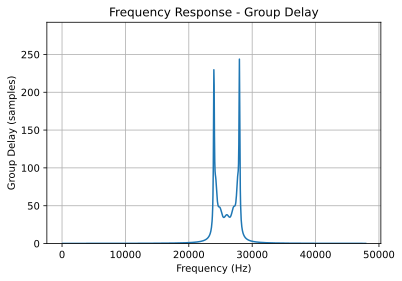

In [34]:
with np.errstate(divide='ignore', invalid='ignore'): #manage singularity warnings
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)
#ylim([-80, 5])
grid();

Gambar tersebut merupakan grafik yang menunjukkan respons frekuensi terhadap delay kelompok atau 'group delay' dalam satuan sampel. Grafik ini digunakan dalam analisis sistem untuk mengevaluasi seberapa cepat fase sinyal berubah terhadap frekuensi.

1. **Sumbu X**: Menunjukkan frekuensi dalam satuan Hertz (Hz). Frekuensi yang ditampilkan berada dalam kisaran dari 0 Hz hingga 50,000 Hz.

2. **Sumbu Y**: Menampilkan group delay dalam satuan sampel. Delay ini menunjukkan berapa banyak sampel yang diambil untuk suatu sinyal memengaruhi respons sistem berdasarkan perubahan fase.

3. **Plot Biru**: Kurva pada grafik menunjukkan dua puncak yang sangat tajam dan tinggi pada sekitar 20,000 Hz dan 30,000 Hz. Ini mengindikasikan bahwa pada dua frekuensi ini, delay kelompoknya sangat tinggi, yang bisa menyebabkan distorsi fase pada sinyal yang sangat signifikan dan mungkin menyebabkan masalah dalam kualitas sinyal atau transmisi.

Grafik ini biasa digunakan dalam engineering audio dan telekomunikasi untuk menilai seberapa baik sebuah sistem memproses sinyal pada berbagai frekuensi tanpa menginduksi penundaan yang berarti pada frekuensi-frekuensi tertentu. Puncak yang tajam umumnya tidak diinginkan karena menandakan adanya potensi masalah pada respons frekuensi sistem tersebut.